# Machine Learning Fundamentals

### tldr:
 * specify a problem
 * collect data
 * select an algorithm to build a model
 * train model
 * test mode
 ________________________
### Suprvised Learning 
 * $x_i$ is a feature observation
 
 
 * $y_i$ is a label (category) or target (numeric)
 
 
 * $(x_i, y_i)$ is a data point in the dataset
 
 
 * the dataset is a set of data points: {$(x_i, y_i)$}
 
 
 * Example:

| breed (id) | weight (x)| life expectancy (y)|
| ---| --- |---|
|German Shepard  | 30     | 13 |
|St. Bernard  | 60     | 10    |
|Chihuahua  | 1      | 20    |
|..  | ..      | ..    

{'German Shepard': (30, 13),
 'St. Bernard': (60, 10),
 'Chihuahua': (1, 20)}
  ________________________
 ### Model Representation
 * **Linear Regression**: Given data point, predict numeric target
 
 
 * Goal: explain variance in $y$ by observing variance in $x$
 
 
 * Approach: estimate a linear relationship between $y$ and $x$
 
 
 * $b$ specifies the bias of the relationship (the y-intercept of the graph)
 
 
 * $m$ specifies the dependency of $y$ to $x$ (the slope of the graph)
 
 
 * $\hat{y}$ is the predicted target, $y$ is the actual target
 
 
 * $\hat{y} = b + m*x$ represents a model
 
 
 * $(y_i - \hat{y}_i)$ describes the loss of the model estimation

### Cost Function
 * each estimation of a pair of parameters can be mapped to a cost
 
 
 * Parameters are learned by observing and reducing the cost 
 
 
 * Cost functions measure the global error of the estimation of a model
 
 
 * Goal: select parameters that minimize a cost function
 
 
 * $\text{MSE} = \frac{1}{2N}\sum(y_i - {\hat{y}}_i)^2$ 
 
 
 * $\text{MSE}(b, m) = \frac{1}{2N}\sum(y_i - (b + m*x_i))^2 $

### Gradient descent
* Gradient descent is an is an optimization algorithm that is used to minimize cost function by iteratively moving in the direction of steepest descent and updating the parameters in each iteration until the algorithm converges (change in cost is below a certain threshold) or the minimum

* learning rate $\lambda$ controls the size of the "steps" taken by the gradient in each iteration

* threshold $\epsilon$ specifies when the algorithm converges

![example](https://cdn-images-1.medium.com/max/1000/1*UUHvSixG7rX2EfNFTtqBDA.gif)

Resource: https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

![example](https://jed-ai.github.io//images/optimization/opt2/fig1.png)

Source: https://jed-ai.github.io/opt2_gradient_descent_1/

## Algorithm
Partially derive cost function $\text{MSE}(b, m) = \frac{1}{2N}\sum(y_i - (b + m*x_i))^2 $ to find the gradient variation rate of each parameter in isolation
 
 1. Choose initial parameter value $b_0$, $m_0$
 2. Choose learning rate $\lambda$ and threshold $\epsilon$
 3. a) iterate until $\quad|b_{new} - b_{old}|\quad+\quad|m_{new} - m_{old}|\quad <\quad\epsilon$
      * $b_{new} = b_{old} - MSE'(b_{old})*\lambda$
      * $m_{new} = m_{old} - MSE'(m_{old})*\lambda$
 4. return final parameter set

_________________________
#### Partial derivations of the cost function:

$\frac{\partial }{\partial m} = \frac{1}{N}\sum  -x_i(y_i - (b+m*x_i))$

$\frac{\partial }{\partial b} = \frac{1}{N}\sum  -(y_i - (b+m*x_i)) = \frac{1}{N}\sum (b+m*x_i) - y_i$
_________________________

![example](https://jed-ai.github.io//images/optimization/opt2/fig2.gif)

![example](https://jed-ai.github.io//images/optimization/opt2/fig3.gif)
    

Source: https://jed-ai.github.io/opt2_gradient_descent_1/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def gradient_descent(x, y, learningrate, epochs):
    N = float(len(y))
    m = 1 
    b = 1 
    costs = []
    for i in range(epochs):
        # predict y_hat which approxiamtion of y
        y_hat = b + x*m
        
        # current costs
        current_cost = 1/(2*N) * np.sum((y - y_hat)**2); 
        costs.append(current_cost)
        
        # compute new parameters
        m = m - ((1/N) * np.sum(-x*(y - y_hat)) * learningrate)
        b = b - ((1/N) * np.sum(y_hat - y) * learningrate)

    return m, b, np.array(costs)

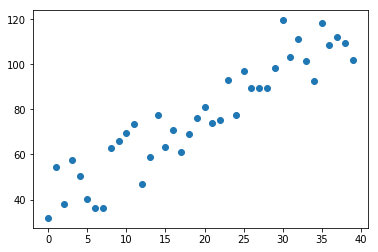

In [38]:
np.random.seed(69)
counts = 40
X = np.arange(counts)
y = X*2 + counts*np.random.random_sample(len(X)) + counts/2

plt.scatter(X, y)
plt.show()

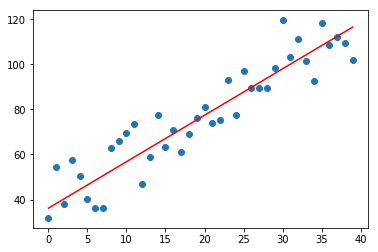

y = 36.181487863086616 + 2.059337096635761 * x


In [39]:
m, b, costs = gradient_descent(X, y, 0.001, 10000)

plt.scatter(X, y)
plt.plot(X, (b+m*X), color ="red")
plt.show()
print("y = {} + {} * x".format(b, m))

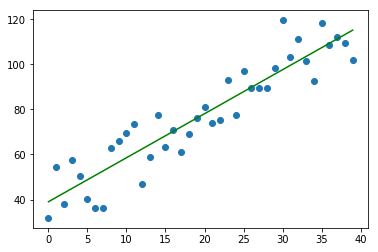

y = [39.02277703] + [[1.95138557]] * x


In [40]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
reg.score(X, y)
m2 = reg.coef_
b2 = reg.intercept_
plt.scatter(X, y)
plt.plot(X, (b2+m2*X), color="green")
plt.show()
print("y = {} + {} * x".format(b2, m2))